# Exploratry Data Analise - Operadora de Saúde

### Importando bibliotecas e verificando as versões


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
import sklearn
import plotly
import numpy as np
from sklearn.cluster import KMeans
from IPython.display import display
from PIL import Image

In [2]:
print(f'''Verificando as versões das bibliotecas:\n
pandas:{pd.__version__}
sklearn:{sklearn.__version__}
plotly:{plotly.__version__}
''')

Verificando as versões das bibliotecas:

pandas:1.5.3
sklearn:1.2.2
plotly:5.13.0



### Coleta de dados

In [4]:
# Dados mesclados e tratados

op_saude = pd.read_csv('tratativa\merged_operadora_saude.csv', sep= ',')

### Manipulação e visualização de dados

Análise do peso e do colesterol dos clientes

In [5]:
# Estatísticas do peso

op_saude.peso.describe()

count    223.000000
mean      95.838565
std       27.410476
min       50.000000
25%       76.000000
50%       93.000000
75%      113.000000
max      184.000000
Name: peso, dtype: float64

<Axes: title={'center': 'Peso dos clientes'}, xlabel='peso', ylabel='Count'>

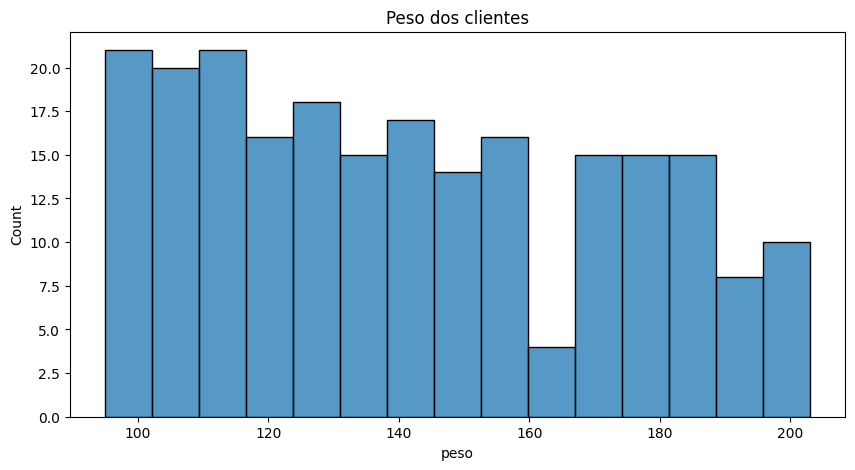

In [104]:
# Criando histograma com base no peso dos clientes

plt.figure(figsize = (10,5))
plt.title('Peso dos clientes')
sns.histplot(op_saude.peso, bins=15)

In [105]:
# Estatísticas do colesterol

op_saude.colesterol.describe()

count    225.000000
mean     168.733333
std       39.413671
min      102.000000
25%      135.000000
50%      168.000000
75%      204.000000
max      235.000000
Name: colesterol, dtype: float64

<Axes: title={'center': 'Colesterol dos clientes'}, xlabel='colesterol', ylabel='Count'>

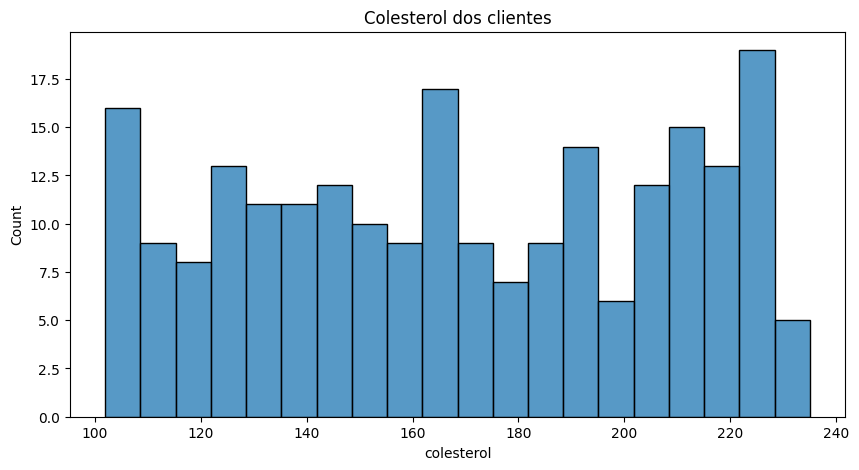

In [106]:
# Criando histograma com base no colesterol dos clientes

plt.figure(figsize=(10,5))
plt.title("Colesterol dos clientes")
sns.histplot(op_saude.colesterol, bins=20)

Verificando a idade dos clientes da operadora de saúde

In [107]:
# Estatísticas da idade

op_saude.idade.describe()

count    225.000000
mean      42.964444
std       15.334327
min       16.000000
25%       30.000000
50%       43.000000
75%       55.000000
max       70.000000
Name: idade, dtype: float64

<Axes: title={'center': 'Idade dos clientes'}, xlabel='idade'>

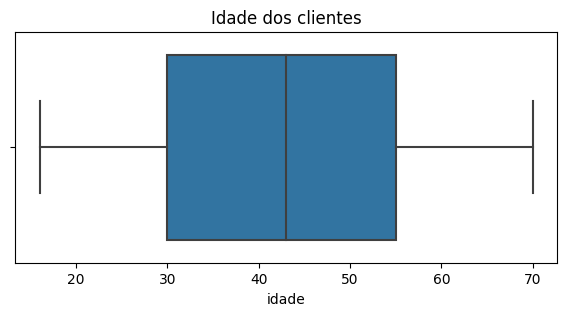

In [108]:
# Criando boxplot baseado na idade dos clientes

plt.figure(figsize=(7,3))
plt.title("Idade dos clientes")
sns.boxplot(x = 'idade', data= op_saude, orient= 'h')

#### Heatmap - Gráfico de correlação

<Axes: title={'center': 'Correlação entre colesterol e imc dos clientes'}>

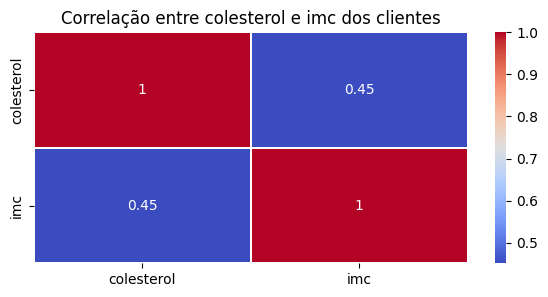

In [38]:
# Correlação entre colesterol e peso dos clientes

plt.figure(figsize=(7,3))
plt.title("Correlação entre colesterol e imc dos clientes")
corr_col_e_pes = op_saude[['colesterol', 'imc']]
sns.heatmap(corr_col_e_pes.corr(), cmap = 'coolwarm', linewidths= 0.1, linecolor='white', annot= True)

### Aplicação do modelo de machine learning


Aplicando o metodo cotovelo para verificar a quantidade de agrupamentos que deverão ser realizados

Calculando WCSS

In [7]:
# Criando função para calcular WCSS

def calcular_wcss(dados_cliente):
  wcss = []
  for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state=0)
    kmeans.fit(X = dados_cliente)
    wcss.append(kmeans.inertia_)
  return wcss

In [25]:
# Criando dados dos clientes de peso, colesterol, idade e imc

clientes_pci = op_saude[['colesterol', 'idade', 'imc']]

In [26]:
# Calculando WCSS dos clientes

wcss_clientes = calcular_wcss(clientes_pci)

C:\Users\amand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\amand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\amand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\amand\AppData\Local\Packages\PythonSoftw

In [27]:
# Visualizando os dados obtidos do WCSS 
for i in range(len(wcss_clientes)):
  print('O cluster', i, ' tem o valor', wcss_clientes[i])

O cluster 0  tem o valor 414502.04413542605
O cluster 1  tem o valor 146196.78502852033
O cluster 2  tem o valor 97698.98829366213
O cluster 3  tem o valor 81355.80660405246
O cluster 4  tem o valor 67311.7313740997
O cluster 5  tem o valor 55847.03759026568
O cluster 6  tem o valor 45717.509239063176
O cluster 7  tem o valor 40204.272822022016
O cluster 8  tem o valor 36145.39878166249
O cluster 9  tem o valor 33227.2307506801


In [28]:
# Visualizando os dados obtidos do WCSS

grafico_wcss = px.line(x=range(1,11), y = wcss_clientes)
fig = go.Figure(grafico_wcss)
fig.update_layout(title='Calculando WCSS',
                  title_x= 0.5,
                  xaxis_title ='Número de Clusters',
                  yaxis_title ='Valor dos Clusters',
                  template='plotly_white')

O Github não plota gráficos dinâmicos, com isso o próximo código é a inserção da visualização do gráfico plotado acima, sem o dinamismo.

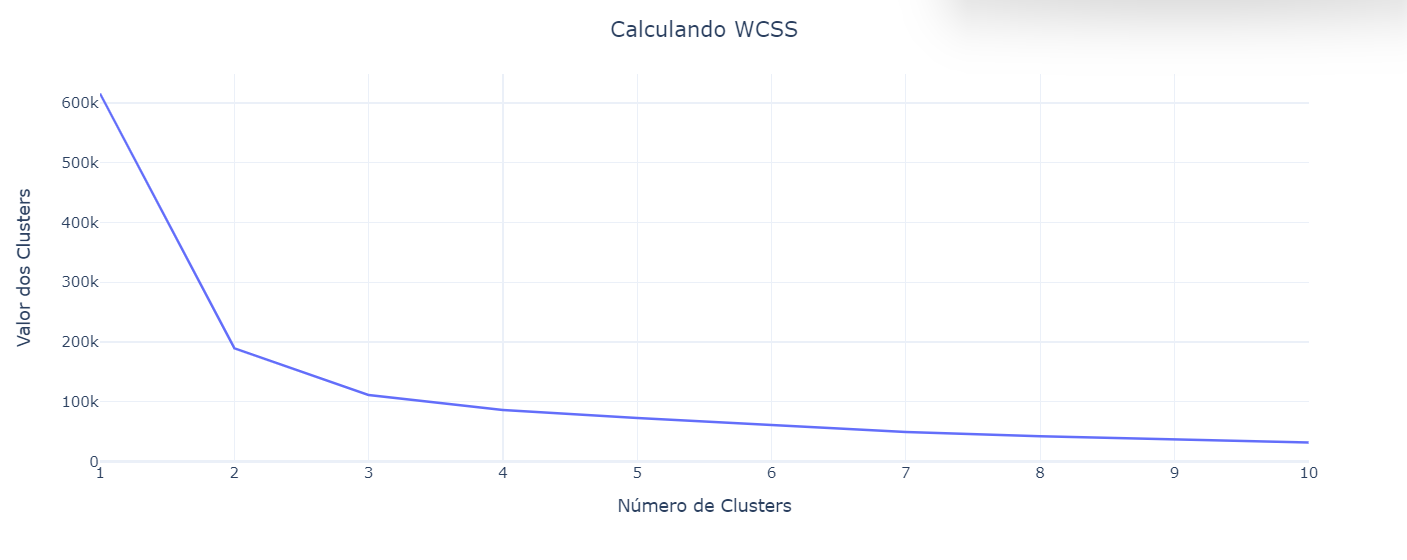

In [125]:
# Inserindo gráfico WCSS

Image.open('WCSS.png')

### Criando agrupamento para cada cliente

In [39]:
# Aplicando algoritmo KMeans
kmeans_clientes = KMeans(n_clusters=2, random_state=0)
op_saude['clusters'] = kmeans_clientes.fit_predict(clientes_pci)

C:\Users\amand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [40]:
# Visualizando os Clusters

op_saude.head()

,Unnamed: 0,id_cliente,altura,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade,id_genero,imc,class_imc,clusters
0,0,1,1.87,102,111,Masculino,23,Roraima,RR,Brasil,17,1,29.17,Sobrepeso,1
1,1,2,1.82,87,135,Masculino,7,Distrito Federal,DF,Brasil,28,1,26.26,Sobrepeso,1
2,2,3,1.90,115,136,Masculino,4,Amazonas,AM,Brasil,62,1,31.86,Obesidade Grau 1,1
3,3,4,1.90,70,167,Feminino,24,Santa Catarina,SC,Brasil,55,0,19.39,Normal Peso,1
4,4,5,1.71,130,158,Masculino,26,Sergipe,SE,Brasil,44,1,44.46,Obesidade Grau 3,1


### Calculando centroides dos clusters

In [41]:
centr_cluster = kmeans_clientes.cluster_centers_

In [42]:
centr_cluster

array([[206.91      ,  44.64      ,  35.5998    ],
       [137.6504065 ,  41.42276423,  28.0397561 ]])

### Plotar gráfico

In [45]:
grafico = px.scatter(x=op_saude['colesterol'],
                     y=op_saude['imc'],
                     color=op_saude['clusters'])

grafico_centr = px.scatter(x=centr_cluster[:,0],
                           y=centr_cluster[:,2],
                           size= [2,2])

grafico_final = go.Figure(data = grafico.data + grafico_centr.data)
grafico_final.update_layout(title='Análise de Clusters',
                            title_x= 0.5,
                            xaxis_title='colesterol',
                            yaxis_title='imc
                            ',
                            template='plotly_white')
grafico_final.show()

O Github não plota gráficos dinâmicos, com isso o próximo código é a inserção da visualização do gráfico plotado acima, sem o dinamismo.

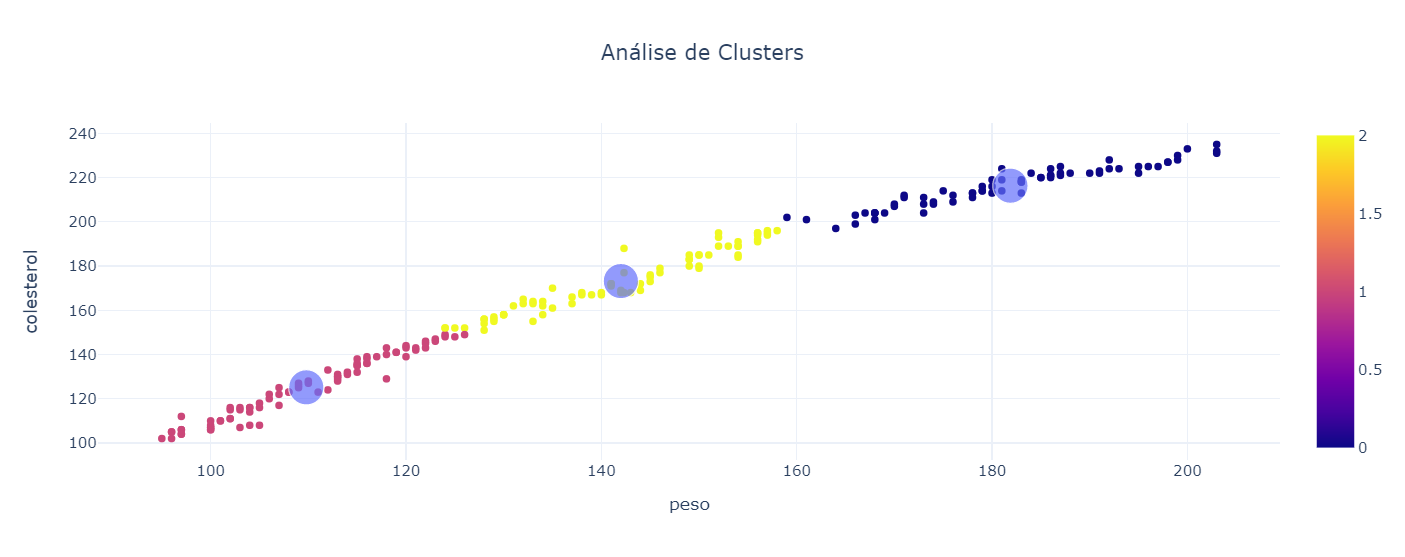

In [131]:
# Inserindo gráfico WCSS

Image.open('Kmeans.png')

### Criando funções para gerar gráfico

In [132]:
def grafico_scatter(x, y, cor, x_cluster, y_cluster, titulo, x_titulo, y_titulo):
  gr1 = px.scatter(x = x,
                   y= y,
                   color= cor)

  gr2 = px.scatter(x= x_cluster,
                   y= y_cluster,
                   size= [3,3,3])

  gf = go.Figure(data = gr1.data + gr2.data)
  gf.update_layout(title= titulo,
                   title_x= 0.5,
                   xaxis_title= x_titulo,
                   yaxis_title= y_titulo,
                   template='plotly_white')
  gf.show()

### Analisando dados gerados

Segmentando clientes baseado na análise dos clusters

In [133]:
# Gerando gráfico da análise dos clusters

x= 'colesterol'
y= 'peso'

grafico_scatter(op_saude[x], op_saude[y],  op_saude['clusters'], centr_cluster[:,1], centr_cluster[:,0], 'Colesterol e Peso', x, y)

In [134]:
# Criando cópia para fazer a segmentação dos clientes
cluster_clientes = op_saude

In [135]:
# Segmentando clientes
cluster_clientes.loc[cluster_clientes['clusters']==1, 'nome_cluster'] = 'Baixo Risco'
cluster_clientes.loc[cluster_clientes['clusters']==2, 'nome_cluster'] = 'Moderado Risco'
cluster_clientes.loc[cluster_clientes['clusters']==0, 'nome_cluster'] = 'Alto Risco'

In [136]:
# Visualizando dos dados
cluster_clientes

,id_cliente,id_genero,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,clusters,nome_cluster
0,1,1,Masculino,17,102.0,111,23,Roraima,RR,1,Baixo Risco
1,2,1,Masculino,28,115.0,135,7,Distrito Federal,DF,1,Baixo Risco
2,3,1,Masculino,62,115.0,136,4,Amazonas,AM,1,Baixo Risco
3,4,0,Feminino,55,140.0,167,24,Santa Catarina,SC,2,Moderado Risco
4,5,1,Masculino,44,130.0,158,26,Sergipe,SE,2,Moderado Risco
...,...,...,...,...,...,...,...,...,...,...,...
220,221,1,Masculino,33,180.0,219,20,Rio Grande do Norte,RN,0,Alto Risco
221,222,0,Feminino,38,116.0,138,15,Paraiba,PB,1,Baixo Risco
222,223,0,Feminino,24,144.0,169,18,Piaui,PI,2,Moderado Risco
223,224,1,Masculino,31,102.0,116,6,Ceara,CE,1,Baixo Risco


## Criando análise gráfica


<Axes: title={'center': 'Gráfico de boxplot'}, xlabel='colesterol', ylabel='estado'>

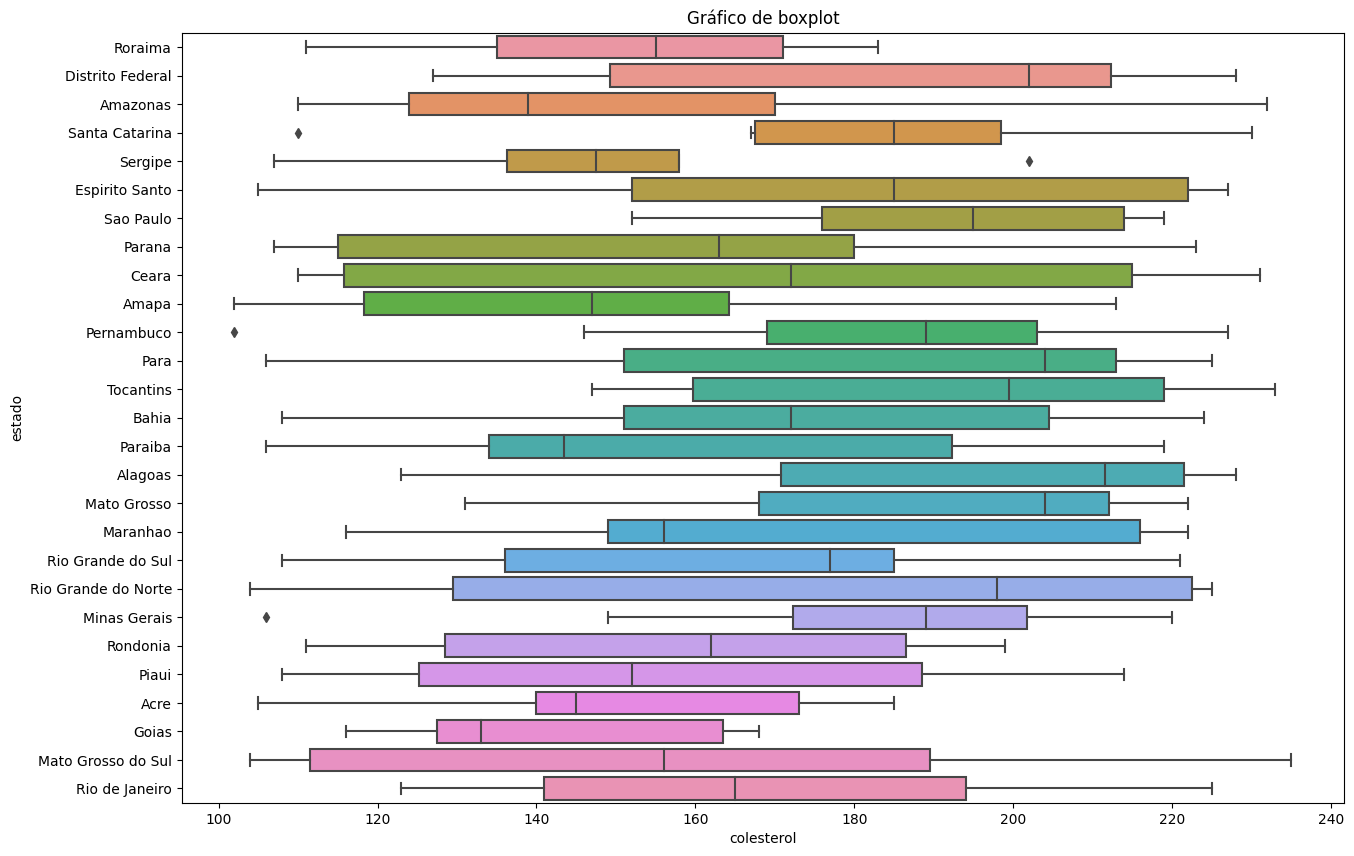

In [137]:
# Criando análise gráfica do colesterol por estado

plt.figure(figsize=(15,10))
plt.title("Gráfico de boxplot")
sns.boxplot(x='colesterol', y= 'estado', data= cluster_clientes, orient= 'h')

<Axes: title={'center': 'Gráfico de boxplot'}, xlabel='peso', ylabel='estado'>

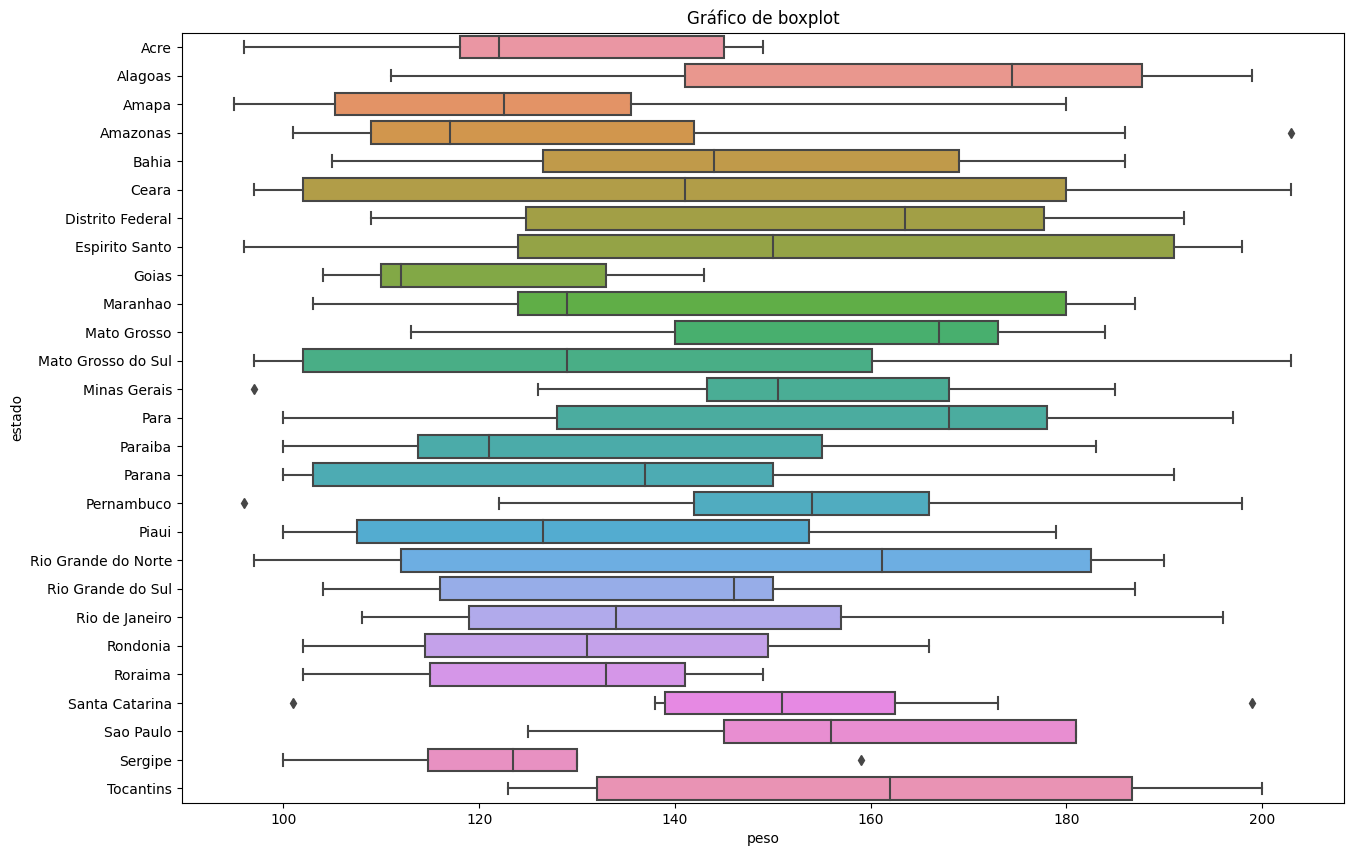

In [138]:
# Criando análise gráfica do peso por estado

plt.figure(figsize=(15,10))
plt.title("Gráfico de boxplot")
sns.boxplot(x='peso', y= 'estado', data= cluster_clientes.sort_values('estado'), orient= 'h')

<Axes: title={'center': 'Gráfico de boxplot'}, xlabel='colesterol', ylabel='nome_cluster'>

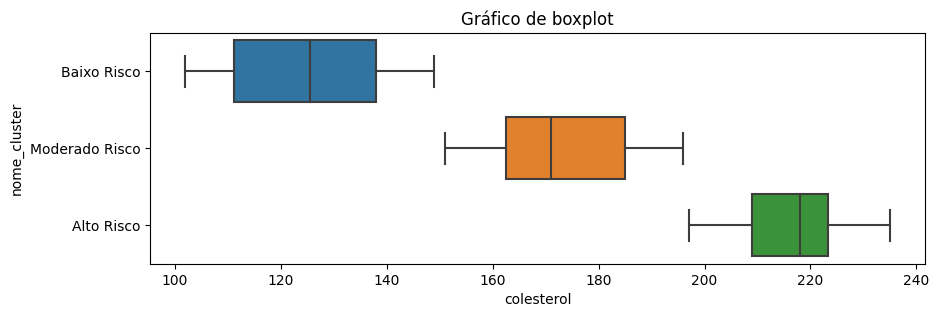

In [139]:
plt.figure(figsize=(10,3))
plt.title("Gráfico de boxplot")
sns.boxplot(x='colesterol', y= 'nome_cluster', data= cluster_clientes, orient= 'h')

## Analise dos cluster criados

In [140]:
# Agrupamento dados de cluster por medio do peso
cluster_clientes.groupby(['nome_cluster', 'genero', 'estado'], as_index = False).agg(total=('peso', 'mean'))

,nome_cluster,genero,estado,total
0,Alto Risco,Feminino,Amazonas,164.000000
1,Alto Risco,Feminino,Bahia,185.500000
2,Alto Risco,Feminino,Ceara,177.000000
3,Alto Risco,Feminino,Distrito Federal,181.666667
4,Alto Risco,Feminino,Espirito Santo,193.000000
...,...,...,...,...
111,Moderado Risco,Masculino,Rio de Janeiro,141.000000
112,Moderado Risco,Masculino,Rondonia,139.440000
113,Moderado Risco,Masculino,Roraima,145.333333
114,Moderado Risco,Masculino,Santa Catarina,151.500000


In [141]:
# Agrupamento dados de cluster por medio do peso
cluster_clientes.groupby(['nome_cluster', 'genero', 'estado'], as_index = True).agg(total=('peso', 'mean'))

total
nome_cluster   genero    estado                      
Alto Risco     Feminino  Amazonas          164.000000
                         Bahia             185.500000
                         Ceara             177.000000
                         Distrito Federal  181.666667
                         Espirito Santo    193.000000
...                                               ...
Moderado Risco Masculino Rio de Janeiro    141.000000
                         Rondonia          139.440000
                         Roraima           145.333333
                         Santa Catarina    151.500000
                         Sergipe           128.000000

[116 rows x 1 columns]

In [142]:
# Criando um dataframe com a tabela acima, mas com index=TRUE
media_peso = cluster_clientes.groupby(['nome_cluster', 'genero', 'estado'], as_index = False).agg(media=('peso', 'mean'))

C:\Users\amand\AppData\Local\Temp\ipykernel_12108\3731874021.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




<Axes: title={'center': 'Distribuição das médias dos pesos por cluster'}, xlabel='nome_cluster', ylabel='media'>

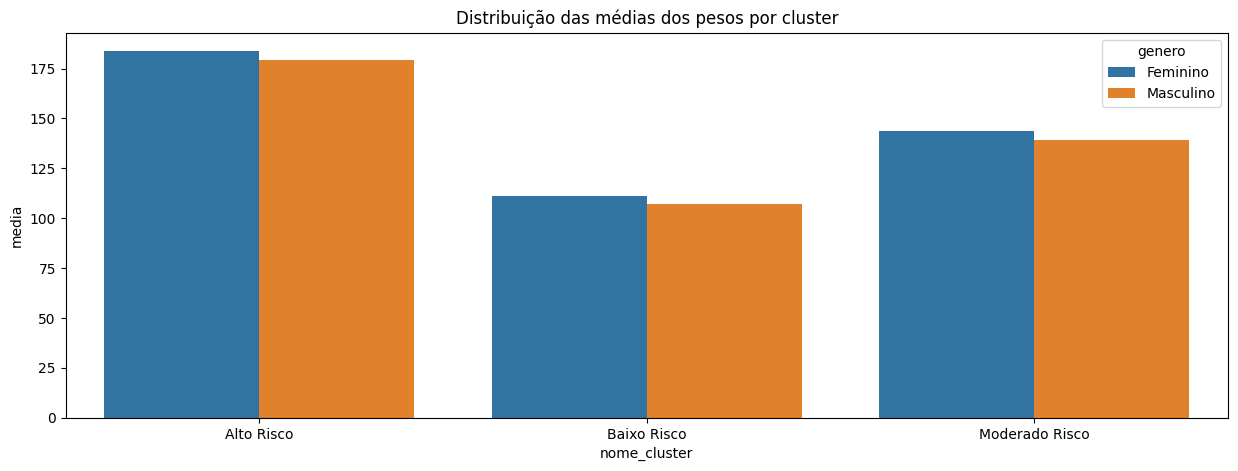

In [143]:
# Criando gráfico de barras com as médias dos pesos por cluster
plt.figure(figsize= (15,5))
plt.title('Distribuição das médias dos pesos por cluster')
sns.barplot(x='nome_cluster', y= 'media', data= media_peso, hue='genero', ci=None)

In [144]:
# Verifica os valores de idade por cluster
cluster_clientes.groupby('nome_cluster')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,68.0,44.544118,15.977067,16.0,31.75,47.0,58.50,69.0
Baixo Risco,82.0,42.634146,15.442056,17.0,29.00,42.5,54.75,70.0
Moderado Risco,75.0,41.893333,14.699304,16.0,30.50,42.0,53.00,70.0


In [145]:
# Verifica os valores de idade por estado
cluster_clientes.groupby('nome_cluster')['estado'].describe()

,count,unique,top,freq
nome_cluster,,,,
Alto Risco,68,24,Distrito Federal,6
Baixo Risco,82,26,Amazonas,8
Moderado Risco,75,26,Roraima,5


In [146]:
# Visualização dos dados dos clientes por alto risco
cluster_clientes.query('nome_cluster == "Alto Risco"')

,id_cliente,id_genero,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,clusters,nome_cluster
5,6,1,Masculino,17,198.0,227,8,Espirito Santo,ES,0,Alto Risco
8,9,0,Feminino,34,191.0,223,16,Parana,PR,0,Alto Risco
9,10,1,Masculino,55,186.0,221,6,Ceara,CE,0,Alto Risco
11,12,1,Masculino,62,188.0,222,6,Ceara,CE,0,Alto Risco
15,16,0,Feminino,65,178.0,213,14,Para,PA,0,Alto Risco
...,...,...,...,...,...,...,...,...,...,...,...
206,207,0,Feminino,54,187.0,225,20,Rio Grande do Norte,RN,0,Alto Risco
216,217,0,Feminino,62,203.0,235,12,Mato Grosso do Sul,MS,0,Alto Risco
219,220,1,Masculino,32,181.0,219,25,Sao Paulo,SP,0,Alto Risco
220,221,1,Masculino,33,180.0,219,20,Rio Grande do Norte,RN,0,Alto Risco


# Exportando dados

In [147]:
cluster_clientes.to_csv('main\classificação_clientes_cluster.csv', sep= ',')